In [118]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [119]:
df = pd.read_csv('user_reviews.csv')

In [121]:
print(df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [122]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64


Cleaning the data

In [123]:
df = df.dropna(subset=['Translated_Review', 'Sentiment'])

In [124]:
df = df.drop_duplicates()

In [125]:
df['Sentiment'] = df['Sentiment'].str.capitalize()

TEXT PREPROCESSING

In [126]:
df = df[df['Translated_Review'].notnull()]
df['Translated_Review'] = df['Translated_Review'].astype(str)

In [127]:
stop_words = {
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and',
    'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
    'between', 'both', 'but', 'by', 'could', 'did', 'do', 'does', 'doing', 'down',
    'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having',
    'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if',
    'in', 'into', 'is', 'it', 'its', 'itself', 'just', 'me', 'more', 'most', 'my',
    'myself', 'no', 'nor', 'not', 'now', 'of', 'off', 'on', 'once', 'only', 'or',
    'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 's', 'same', 'she',
    'should', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs',
    'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through',
    'to', 'too', 'under', 'until', 'up', 'very', 'was', 'we', 'were', 'what', 'when',
    'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'you', 'your',
    'yours', 'yourself', 'yourselves'
}

In [128]:
df['Clean_Review'] = df['Translated_Review'].apply(preprocess_text)


In [129]:
print(df[['Translated_Review', 'Clean_Review']].head(10))

                                    Translated_Review  \
0   I like eat delicious food. That's I'm cooking ...   
1     This help eating healthy exercise regular basis   
3          Works great especially going grocery store   
4                                        Best idea us   
5                                            Best way   
6                                             Amazing   
8                                Looking forward app,   
9               It helpful site ! It help foods get !   
10                                          good you.   
11  Useful information The amount spelling errors ...   

                                         Clean_Review  
0   like eat delicious food thats im cooking food ...  
1          help eating healthy exercise regular basis  
3          works great especially going grocery store  
4                                        best idea us  
5                                            best way  
6                                   

FEATURE ENGINEERING 

In [130]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Clean_Review'])

In [131]:
y = df['Sentiment']

TRAIN - TEST SPLIT

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [134]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7282370769489813

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.39      0.54      1272
     Neutral       0.74      0.10      0.17       871
    Positive       0.71      0.99      0.83      3796

    accuracy                           0.73      5939
   macro avg       0.78      0.49      0.51      5939
weighted avg       0.75      0.73      0.67      5939



VISUALIZING

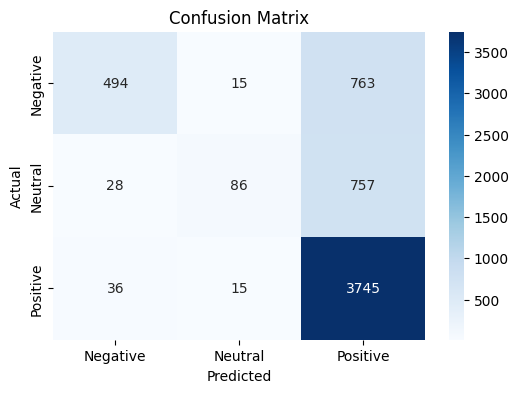

In [135]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


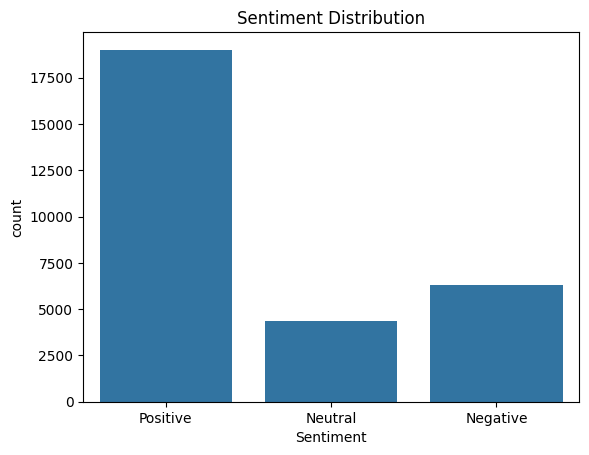

In [136]:
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()